# Initiation

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [87]:
%matplotlib inline

# Data Loading

In [115]:
file_jaccard_hg19 = "../data/processed/output_logs/jaccard_hg19.txt"
file_jaccard_hg38 = "../data/processed/output_logs/jaccard_hg38.txt"

jaccard_hg19 = pd.read_table(file_jaccard_hg19)
jaccard_hg38 = pd.read_table(file_jaccard_hg38)

# Data Table Cleaning

The marker_file and mutations_file columns are the raw names of the files used as input to the Jaccard statistic. Here, we clean the names to remove the "\_SORTED" flag, remove the randomised controls and a

In [116]:
def clean_file_names(df):
    file_name_fields = ["MARKER_FILE", "MUTATIONS_FILE"]
    
    df["RANDOM_CONTROL"] = df["MUTATIONS_FILE"].str.contains("RANDOM")
    
    for field in file_name_fields:
        df[field] = df[field] \
                    .str.replace("_SORTED.bed", "") \
                    .str.replace("RANDOMISED", "") \
                    .str.replace(".peak.txt", "") \
                    .str.replace("_liftedto19", "") \
                    .str.replace(".2500-5000", "") \
                    .str.replace("_liftedto38", "") \
                    .str.replace("_liftedto19", "")
    return df

In [117]:
def clean_mutations_hg38(df):
    df["MUTATIONS_FILE"] = df["MUTATIONS_FILE"] \
                            .apply(lambda x: x.split(".mutect")[0]) \
                            .apply(lambda x: x.split("TCGA.")[1])
            
    return df

In [118]:
jaccard_hg19_clean = clean_file_names(jaccard_hg19)
jaccard_hg38_clean = clean_mutations_hg38(clean_file_names(jaccard_hg38))

In [119]:
jaccard_hg19_clean

,MARKER_FILE,MUTATIONS_FILE,INTERSECTION,UNION,JACCARD,N_INTERSECTIONS,RANDOM_CONTROL
0,GSM1341955_NI,er_negative_tcga_brca_hg19s,1078,12587973,0.000086,478,False
1,GSM1341955_NI,er_positive_tcga_brca_hg19s,2176,12651532,0.000172,1018,False
2,GSM1341955_NI,er_negative_tcga_brca_hg19s,401,12580238,0.000032,203,True
3,GSM1341955_NI,er_positive_tcga_brca_hg19s,944,12646957,0.000075,475,True
4,GSM1341956_NI_3,er_negative_tcga_brca_hg19s,1293,9268654,0.000140,511,False
5,GSM1341956_NI_3,er_positive_tcga_brca_hg19s,2149,9332455,0.000230,1039,False
6,GSM1341956_NI_3,er_negative_tcga_brca_hg19s,274,9261261,0.000030,138,True
7,GSM1341956_NI_3,er_positive_tcga_brca_hg19s,629,9328168,0.000067,316,True
8,GSM1341957_6h,er_negative_tcga_brca_hg19s,1034,12128939,0.000085,509,False
9,GSM1341957_6h,er_positive_tcga_brca_hg19s,2490,12192140,0.000204,1168,False


In [120]:
jaccard_hg38_clean

,MARKER_FILE,MUTATIONS_FILE,INTERSECTION,UNION,JACCARD,N_INTERSECTIONS,RANDOM_CONTROL
0,GSM1341955_NI,BRCA,4800,13127055,0.000366,2154,False
1,GSM1341955_NI,COAD,9068,13338088,0.000680,4514,False
2,GSM1341955_NI,READ,2074,12985109,0.000160,1032,False
3,GSM1341955_NI,BRCA,2066,13111021,0.000158,1037,True
4,GSM1341955_NI,COAD,4109,13373932,0.000307,2060,True
5,GSM1341955_NI,READ,1026,12986827,0.000079,515,True
6,GSM1341956_NI_3,BRCA,4977,9775988,0.000509,2200,False
7,GSM1341956_NI_3,COAD,8777,9987489,0.000879,4343,False
8,GSM1341956_NI_3,READ,2201,9634092,0.000228,1101,False
9,GSM1341956_NI_3,BRCA,1507,9760690,0.000154,756,True


Quick note on GSM identities for GSE55699:
```
GSM1341955 	H2AXpS139-ChIP-seq non-infected rep1
GSM1341956 	H2AXpS139-ChIP-seq non-infected rep2
GSM1341957 	H2AXpS139-ChIP-seq 6 h H.pylori rep1
GSM1341958 	H2AXpS139-ChIP-seq 6 h H.pylori rep2
GSM1341959 	H2AXpS139-ChIP-seq 18 h H.pylori rep1
GSM1341960 	H2AXpS139-ChIP-seq 18 h H.pylori rep2
GSM1341961 	H2AXpS139-ChIP-seq 10 Gy IR rep1
GSM1341962 	H2AXpS139-ChIP-seq 10 Gy IR rep2
```

# Data Plots

In [121]:
def plot_data_bars(df, title):
    colors = {True: "slategray", False: "skyblue"}
    ax = df.plot.bar(x="MARKER_FILE", y="JACCARD", legend=False, 
                    color=list(er_pos["RANDOM_CONTROL"].map(colors)))
    ax.set_ylabel("Jaccard Statistic")
    ax.set_title(title)
    return ax

## hg19: ER+ve and ER-ve BRCA

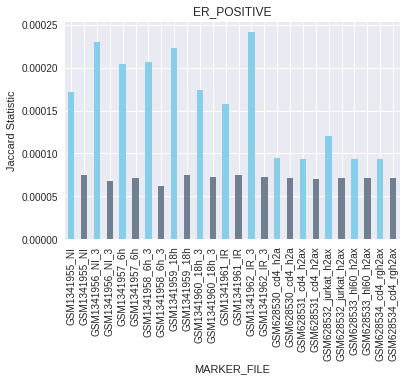

In [122]:
er_pos = jaccard_hg19_clean[jaccard_hg19_clean["MUTATIONS_FILE"]=="er_positive_tcga_brca_hg19s"]
er_pos_plot = plot_data_bars(er_pos, "ER_POSITIVE")

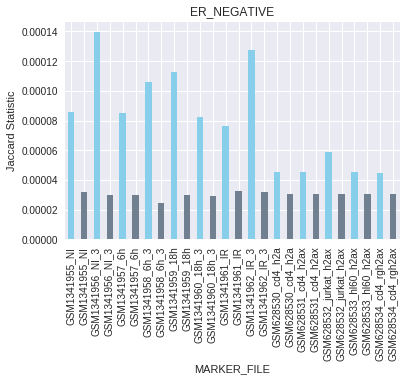

In [123]:
er_neg = jaccard_hg19_clean[jaccard_hg19_clean["MUTATIONS_FILE"]=="er_negative_tcga_brca_hg19s"]
er_neg_plot = plot_data_bars(er_neg, "ER_NEGATIVE")

## hg38: BRCA, COAD, READ

### BRCA

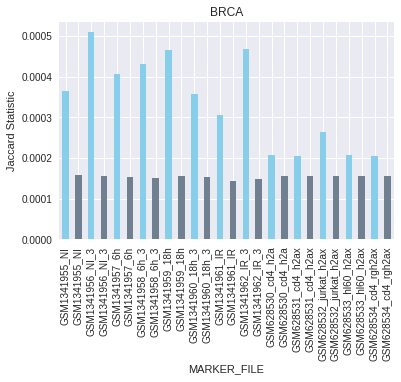

In [124]:
brca = jaccard_hg38_clean[jaccard_hg38_clean["MUTATIONS_FILE"]=="BRCA"]
brca = plot_data_bars(brca, "BRCA")

### COAD

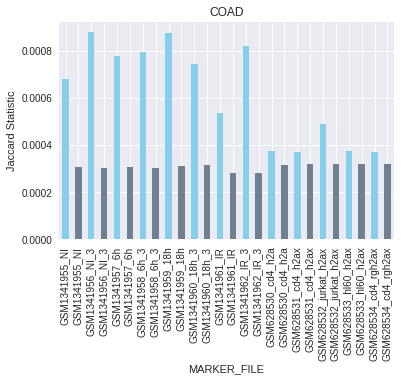

In [125]:
coad = jaccard_hg38_clean[jaccard_hg38_clean["MUTATIONS_FILE"]=="COAD"]
coad = plot_data_bars(coad, "COAD")

### READ

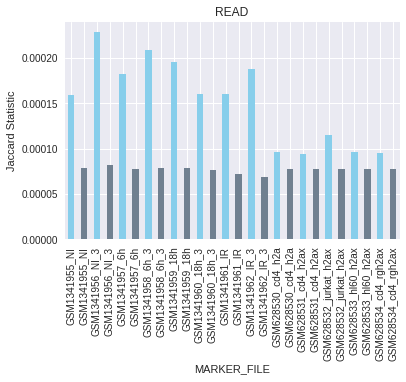

In [126]:
read = jaccard_hg38_clean[jaccard_hg38_clean["MUTATIONS_FILE"]=="READ"]
read = plot_data_bars(read, "READ")